# The Federal Reserve statements

This scrapes the contents of https://federalreserve.gov/monetarypolicy/fomccalendars.htm for copies of the U.S. Federal Reserve monetary policy statements.

An analysis is provided at a separate notebook.

## Do your imports

In [34]:
import pandas as pd
import re
import numpy as np
import requests
from bs4 import BeautifulSoup

## Scraping proper using bs4

First step is to scrape all tabled information, that is, excluding all the contents of **links**.

We make a **lists of dictionaries** for this one. The Federal Reserve website puts all their decisions in a table. However, rows have two different names: a **shaded** one and the **not** shaded one. Hence, the best way to go around this is to create two lists of dicts.

In [35]:
raw_html = requests.get("https://federalreserve.gov/monetarypolicy/fomccalendars.htm").content
soup_doc = BeautifulSoup(raw_html, "html.parser")
# soup_doc

### Non-shaded rows

In [36]:
dataset=[]
containers = soup_doc.find_all("div", {"class": "row fomc-meeting"})
for container in containers:
    data={}
    data ['month'] = container.find("div", {"class": "fomc-meeting__month col-xs-5 col-sm-3 col-md-2"}).text
    try:
        data ['date'] = container.find("div", {"class":"fomc-meeting__date col-xs-4 col-sm-9 col-md-10 col-lg-1"}).text
    except:
        data ['date'] = container.find("div", {"class":"fomc-meeting__date col-xs-4 col-sm-9 col-md-10 col-lg-2"}).text
    try:
        data ['link'] = container.find("div", {"class": "col-xs-12 col-md-4 col-lg-2"}).select_one('a[href*=".htm"]').attrs['href']
    except:
        data ['link'] = None
    dataset.append(data)
dataset

[{'month': 'Jan/Feb',
  'date': '31-1',
  'link': '/newsevents/pressreleases/monetary20230201a.htm'},
 {'month': 'May',
  'date': '2-3',
  'link': '/newsevents/pressreleases/monetary20230503a.htm'},
 {'month': 'July',
  'date': '25-26',
  'link': '/newsevents/pressreleases/monetary20230726a.htm'},
 {'month': 'Oct/Nov',
  'date': '31-1',
  'link': '/newsevents/pressreleases/monetary20231101a.htm'},
 {'month': 'January',
  'date': '25-26',
  'link': '/newsevents/pressreleases/monetary20220126a.htm'},
 {'month': 'May',
  'date': '3-4',
  'link': '/newsevents/pressreleases/monetary20220504a.htm'},
 {'month': 'July',
  'date': '26-27',
  'link': '/newsevents/pressreleases/monetary20220727a.htm'},
 {'month': 'November',
  'date': '1-2',
  'link': '/newsevents/pressreleases/monetary20221102a.htm'},
 {'month': 'January',
  'date': '26-27',
  'link': '/newsevents/pressreleases/monetary20210127a.htm'},
 {'month': 'April',
  'date': '27-28',
  'link': '/newsevents/pressreleases/monetary20210428a.

### Shaded rows

In [37]:
dataset2=[]
rows = soup_doc.find_all("div", {"class": "fomc-meeting--shaded row fomc-meeting"})
for row in rows:
    data={}
    try:
        data['month'] = row.find("div", {"class": "fomc-meeting--shaded fomc-meeting__month col-xs-5 col-sm-3 col-md-2"}).text
    except:
        data['month']= row.find("div", {"class": "fomc-meeting__month col-xs-5 col-sm-3 col-md-2"}).text
    try:
        data['date'] = row.find("div", {"class":"fomc-meeting__date col-xs-4 col-sm-9 col-md-10 col-lg-1"}).text
    except:
        data['date'] = row.find("div", {"class":"fomc-meeting__date col-xs-4 col-sm-9 col-md-10 col-lg-2"}).text
    try:
        data['link'] = row.find("div", {"class": "col-xs-12 col-md-4 col-lg-2"}).select_one('a[href*=".htm"]').attrs['href']
    except:
        data['link'] = None
    dataset2.append(data)
dataset2

[{'month': 'March',
  'date': '21-22*',
  'link': '/newsevents/pressreleases/monetary20230322a.htm'},
 {'month': 'June',
  'date': '13-14*',
  'link': '/newsevents/pressreleases/monetary20230614a.htm'},
 {'month': 'September',
  'date': '19-20*',
  'link': '/newsevents/pressreleases/monetary20230920a.htm'},
 {'month': 'December',
  'date': '12-13*',
  'link': '/newsevents/pressreleases/monetary20231213a.htm'},
 {'month': 'March',
  'date': '15-16*',
  'link': '/newsevents/pressreleases/monetary20220316a.htm'},
 {'month': 'June',
  'date': '14-15*',
  'link': '/newsevents/pressreleases/monetary20220615a.htm'},
 {'month': 'September',
  'date': '20-21*',
  'link': '/newsevents/pressreleases/monetary20220921a.htm'},
 {'month': 'December',
  'date': '13-14*',
  'link': '/newsevents/pressreleases/monetary20221214a.htm'},
 {'month': 'March',
  'date': '16-17*',
  'link': '/newsevents/pressreleases/monetary20210317a.htm'},
 {'month': 'June',
  'date': '15-16*',
  'link': '/newsevents/pressrel

We arrange the information into a **list of dictionaries** in preparation to transforming it into a **data frame** for pandas analysis later.

## Our dataframes

Our **first data frame** which cover *non-shaded* rows.

In [38]:
df1 = pd.DataFrame(dataset)
df1.head()

,month,date,link
0,Jan/Feb,31-1,/newsevents/pressreleases/monetary20230201a.htm
1,May,2-3,/newsevents/pressreleases/monetary20230503a.htm
2,July,25-26,/newsevents/pressreleases/monetary20230726a.htm
3,Oct/Nov,31-1,/newsevents/pressreleases/monetary20231101a.htm
4,January,25-26,/newsevents/pressreleases/monetary20220126a.htm


Our **second data frame** which cover *shaded* rows

In [39]:
df2 = pd.DataFrame(dataset2)
df2.head()

,month,date,link
0,March,21-22*,/newsevents/pressreleases/monetary20230322a.htm
1,June,13-14*,/newsevents/pressreleases/monetary20230614a.htm
2,September,19-20*,/newsevents/pressreleases/monetary20230920a.htm
3,December,12-13*,/newsevents/pressreleases/monetary20231213a.htm
4,March,15-16*,/newsevents/pressreleases/monetary20220316a.htm


We now need to **combine them** keeping in mind that the rows should **alternate** to follow the Fed's format on its website (see image).

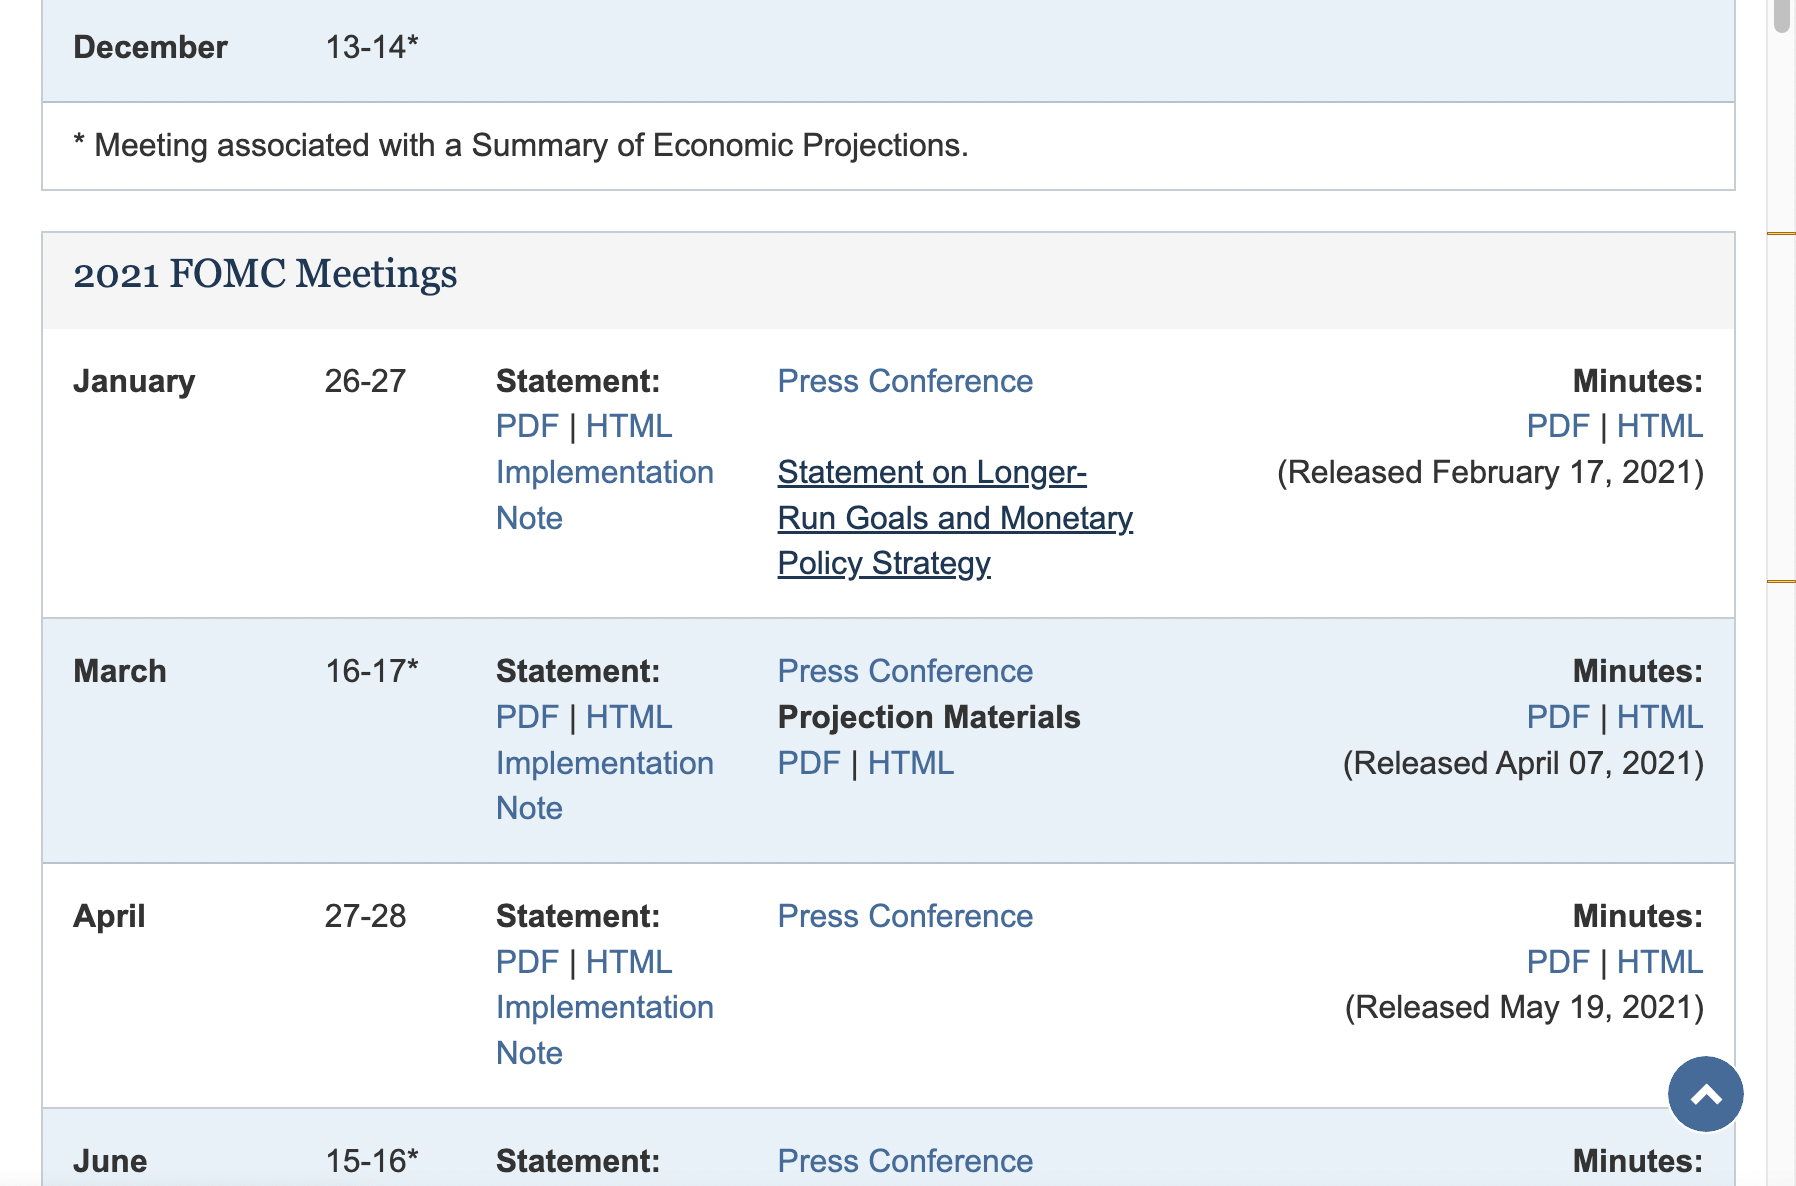

In [40]:
df = pd.concat([df1, df2]).sort_index(kind='merge', ignore_index=True)
df

,month,date,link
0,Jan/Feb,31-1,/newsevents/pressreleases/monetary20230201a.htm
1,March,21-22*,/newsevents/pressreleases/monetary20230322a.htm
2,May,2-3,/newsevents/pressreleases/monetary20230503a.htm
3,June,13-14*,/newsevents/pressreleases/monetary20230614a.htm
4,July,25-26,/newsevents/pressreleases/monetary20230726a.htm
...,...,...,...
58,November,6-7,None
59,March,19-20*,None
60,June,11-12*,None
61,September,17-18*,None


## Data cleaning

Now comes the hard part.

We will do a lot of fixing here. To name them:

* We will have to complete the **links** provided to be able to access them later.
* We will have to combine **month** and **date** into one and put applicable **years** on them.
* It's advisable to convert them into date time as well.

### Cleaning (and completing the links)

In [41]:
df['complete_link'] = 'https://www.federalreserve.gov' + df['link'].astype(str) #This creates a new column

df = df.drop('link', axis=1) #This drops the link column once the new one is created

df.complete_link = df.complete_link.str.replace('https://www.federalreserve.govNone', 'None', regex=False)
#This replaces those without links in the new column with the word "None"

df = df.rename(columns={"complete_link": "links"}) #This is just to rename the new column to 'links' again

df

,month,date,links
0,Jan/Feb,31-1,https://www.federalreserve.gov/newsevents/pres...
1,March,21-22*,https://www.federalreserve.gov/newsevents/pres...
2,May,2-3,https://www.federalreserve.gov/newsevents/pres...
3,June,13-14*,https://www.federalreserve.gov/newsevents/pres...
4,July,25-26,https://www.federalreserve.gov/newsevents/pres...
...,...,...,...
58,November,6-7,None
59,March,19-20*,None
60,June,11-12*,None
61,September,17-18*,None


### Dropping 2023 calendar and cancelled meetings

For the purposes of this dataset, we can drop those meetings which were cancelled by the Fed as well as those yet to happen in 2023 (there's a table of schedule at the bottom of the page).

In [42]:
df.head()

,month,date,links
0,Jan/Feb,31-1,https://www.federalreserve.gov/newsevents/pres...
1,March,21-22*,https://www.federalreserve.gov/newsevents/pres...
2,May,2-3,https://www.federalreserve.gov/newsevents/pres...
3,June,13-14*,https://www.federalreserve.gov/newsevents/pres...
4,July,25-26,https://www.federalreserve.gov/newsevents/pres...


In [43]:
df = df.replace('None', np.nan).dropna(how='all')
df = df.reset_index(drop=True)
df.head()

,month,date,links
0,Jan/Feb,31-1,https://www.federalreserve.gov/newsevents/pres...
1,March,21-22*,https://www.federalreserve.gov/newsevents/pres...
2,May,2-3,https://www.federalreserve.gov/newsevents/pres...
3,June,13-14*,https://www.federalreserve.gov/newsevents/pres...
4,July,25-26,https://www.federalreserve.gov/newsevents/pres...


In [44]:
df= df.dropna()
df

,month,date,links
0,Jan/Feb,31-1,https://www.federalreserve.gov/newsevents/pres...
1,March,21-22*,https://www.federalreserve.gov/newsevents/pres...
2,May,2-3,https://www.federalreserve.gov/newsevents/pres...
3,June,13-14*,https://www.federalreserve.gov/newsevents/pres...
4,July,25-26,https://www.federalreserve.gov/newsevents/pres...
5,September,19-20*,https://www.federalreserve.gov/newsevents/pres...
6,Oct/Nov,31-1,https://www.federalreserve.gov/newsevents/pres...
7,December,12-13*,https://www.federalreserve.gov/newsevents/pres...
8,January,25-26,https://www.federalreserve.gov/newsevents/pres...
9,March,15-16*,https://www.federalreserve.gov/newsevents/pres...


## Dealing with dates

I put in an entire section for this one because it's a little complex. We do have the months and years in separate columns but first, they look messy. Second, if you look at indices after the first *unscheduled* meeting, the entire sequence of meetings is messed up and that's because in 2020, the Fed held **several meetings** in March (and cancelled some of them, too) to respond to the pandemic.

We want now the meetings to be chronological and to do that we need the complete dates including the years. We get that from the **links column** which we will have to clean first.

### First, grab that part of the link that contains the date

Create a new column for them, too (in this case we will just call it **meetings**)

In [45]:
df['meetings'] = df.links.str.split(expand=True, pat="/")[5]
df.head()

,month,date,links,meetings
0,Jan/Feb,31-1,https://www.federalreserve.gov/newsevents/pres...,monetary20230201a.htm
1,March,21-22*,https://www.federalreserve.gov/newsevents/pres...,monetary20230322a.htm
2,May,2-3,https://www.federalreserve.gov/newsevents/pres...,monetary20230503a.htm
3,June,13-14*,https://www.federalreserve.gov/newsevents/pres...,monetary20230614a.htm
4,July,25-26,https://www.federalreserve.gov/newsevents/pres...,monetary20230726a.htm


### Regex your way into it!

Let's remove everything except the numbers which we will convert to date format afterwards.

In [46]:
df.meetings = df.meetings.str.replace(r'[^0-9]+',"", regex=True) #removes everything except numbers
df.meetings = pd.to_datetime(df.meetings, format="%Y%m%d") #changes everything to datetime
df.head()

,month,date,links,meetings
0,Jan/Feb,31-1,https://www.federalreserve.gov/newsevents/pres...,2023-02-01
1,March,21-22*,https://www.federalreserve.gov/newsevents/pres...,2023-03-22
2,May,2-3,https://www.federalreserve.gov/newsevents/pres...,2023-05-03
3,June,13-14*,https://www.federalreserve.gov/newsevents/pres...,2023-06-14
4,July,25-26,https://www.federalreserve.gov/newsevents/pres...,2023-07-26


### Finally, rearrange your columns chronologically!

Drop the **month** and **date** columns, too. Just remember that the date you have now is the last date of the Fed's typical two-day meeting.

In [47]:
df= df.drop(['month', 'date'], axis=1) #removes columns
df = df[['meetings', 'links']] #rearranges column sequence
df= df.sort_values('meetings')#arranges chronologically
df.head()

,meetings,links
44,2018-01-31,https://www.federalreserve.gov/newsevents/pres...
51,2018-03-21,https://www.federalreserve.gov/newsevents/pres...
46,2018-05-02,https://www.federalreserve.gov/newsevents/pres...
53,2018-06-13,https://www.federalreserve.gov/newsevents/pres...
48,2018-08-01,https://www.federalreserve.gov/newsevents/pres...


## Scraping actual statements

We will use BeautifulSoup on this one. The process is easier since we already have the links in our dataframes and all we have to do is to just **access and grab** their contents one by one.

To do that we need to put them back as **list of dictionaries** to access the links. 

In [48]:
link_dicts = df.to_dict('records') #converts back df to lists of dictionaries

In [49]:
statements=[]
for statement in link_dicts:
    text={}
    href = statement['links']
    try:
        raw_html = requests.get(href).content
        doc = BeautifulSoup(raw_html, "html.parser")
        text['links'] = statement['links']
        text ['statements']= doc.find('div', {"class": "col-xs-12 col-sm-8 col-md-8"}).text.strip()
    except: 
        text['links'] = statement['links'] = None
        text['statements'] = None
    statements.append(text)
# statements

As you can see, the statements are arranged as a **single block** per row to match their place in the df. This is, of course, not the ideal way and may be improved. Below is a **third data frame** containing the links and statements themselves.

We then **merge** this information with our earlier df.

### Third data frame: actual statements

In [50]:
fed_statements=pd.DataFrame(statements)
fed_statements.head()

,links,statements
0,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
1,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
2,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
3,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
4,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...


## Merging dataframes

We will now merge both our main **df** and **fed_statements** dataframe into one before saving them into CSV. 

In [51]:
merged = df.merge(fed_statements, suffixes=('_left'))
merged

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6704/1239607941.py:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  merged = df.merge(fed_statements, suffixes=('_left'))


,meetings,links,statements
0,2018-01-31,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
1,2018-03-21,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
2,2018-05-02,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
3,2018-06-13,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
4,2018-08-01,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
5,2018-09-26,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
6,2018-11-08,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
7,2018-12-19,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
8,2019-01-30,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...
9,2019-03-20,https://www.federalreserve.gov/newsevents/pres...,Information received since the Federal Open Ma...


## Save to CSV

In [52]:
# merged.to_csv('merged.csv', index=False)